## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [4]:
def solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c):

    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    return 0

## Numba accelerator

In [5]:
@njit(fastmath=True)
def solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c):

    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    return 0

## Pyccel accelerator

In [6]:
def solve_1d_linearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float', c:'float'):

    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

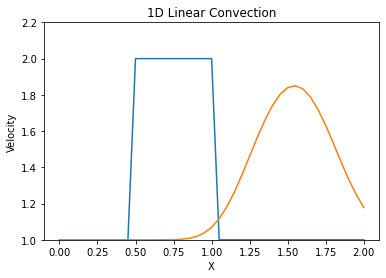

In [13]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
c = 1.      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [6]:
%timeit solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)

22.7 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Function with numba accelerator

In [7]:
%timeit solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c)

65 µs ± 2.76 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [12]:
solve_1d_linearconv_f90 = epyccel(solve_1d_linearconv_pyccel)

In [11]:
%timeit solve_1d_linearconv_f90(u, un, nt, nx, dt, dx, c)

15.6 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
